In [1]:
import time
import pandas as pd
import numpy as np
from copy import deepcopy
import sys
import os
import csv
from itertools import cycle
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
# warnings.resetwarnings() # To change it back (optional)

sys.path.append("/nobackup/gogandhi/alt_means_sans_k/")

from scripts.similarity_scores import get_scores
from scripts.nets_and_embeddings import *

In [2]:
N=10000
params = {
    "N": N,
    "k": 50,
    "maxk":  int(np.sqrt(10 * N)),
    "minc": 50,
    "maxc": int(np.ceil(np.sqrt(N * 10))),
    "tau": 3.0,
    "tau2": 1.0,
    "mu": 0.2,
    }


emb_params = {
    "method": "node2vec",
    "window_length": 10,
    "walk_length": 80,
    "num_walks": 10,
    "dim": 64,
}


num_cores = 10

runs = np.arange(1, 11)

test_run=False

device_names = [f"cuda:{i}" for i in [0,1]]  # ['cuda:0', 'cuda:1', 'cuda:2', 'cuda:3']

path_name = f"/nobackup/gogandhi/alt_means_sans_k/data/experiment_walklen_change_{params['N']}_{params['k']}_{params['tau']}"
if test_run:
    path_name += "_test_run"


#################### End of Params #################

#if not os.path.isdir(path_name):
#    os.mkdir(path_name)

def create_unique_folder(base_folder):
    if os.path.exists(base_folder):
        index = 1
        while True:
            new_folder = f"{base_folder}_{index}"
            if not os.path.exists(new_folder):
                break
            index += 1
    else:
        new_folder = base_folder

    os.mkdir(new_folder)
    return new_folder
    
path_name = create_unique_folder(path_name)


In [3]:
# First let's create networks and embeddings first, and then run clustering:
#runs = np.arange(1, 11)
runs = np.arange(1, 8)
mu_values = np.round(np.arange(0, 1.05, 0.05),decimals=2)
#walk_lengths = [40,10]
walk_lengths = [320, 160,80,40,10]


for walk_length in walk_lengths:
    
    start_dim_time = time.perf_counter()
    temp_emb_params = deepcopy(emb_params)
    temp_emb_params['walk_length']= walk_length
    
    if not os.path.exists(f"{path_name}/walklen_{temp_emb_params['walk_length']}/"):
        os.mkdir(f"{path_name}/walklen_{temp_emb_params['walk_length']}/")
        
    for run_no in runs:
        start_time = time.perf_counter()
        

        if not os.path.exists(f"{path_name}/walklen_{temp_emb_params['walk_length']}/Run_{run_no}/"):
            os.mkdir(f"{path_name}/walklen_{temp_emb_params['walk_length']}/Run_{run_no}/")
        
        for mu in mu_values:
            
            temp_params = deepcopy(params)
            
            temp_params['mu']= mu
            
            net, comm, emb = create_and_save_network_and_embedding(temp_params,temp_emb_params, f"{path_name}/walklen_{temp_emb_params['walk_length']}/Run_{run_no}/")
            print(walk_length, run_no, mu)

        print(f"Run took: {time.perf_counter() - start_time}, avg time per mu_val: {(time.perf_counter() - start_time)/len(mu_values)}")
    print(f"Walk Length {walk_length} took:{time.perf_counter() - start_dim_time} ") 

320 1 0.0
320 1 0.05
320 1 0.1
320 1 0.15
320 1 0.2
320 1 0.25
320 1 0.3
320 1 0.35
320 1 0.4
320 1 0.45
320 1 0.5
320 1 0.55
320 1 0.6
320 1 0.65
320 1 0.7
320 1 0.75
320 1 0.8
320 1 0.85
320 1 0.9
320 1 0.95
320 1 1.0
Run took: 3735.6060422305018, avg time per mu_val: 177.88600253668568
320 2 0.0
320 2 0.05
320 2 0.1
320 2 0.15
320 2 0.2
320 2 0.25
320 2 0.3
320 2 0.35
320 2 0.4
320 2 0.45
320 2 0.5
320 2 0.55
320 2 0.6
320 2 0.65
320 2 0.7
320 2 0.75
320 2 0.8
320 2 0.85
320 2 0.9
320 2 0.95
320 2 1.0
Run took: 3690.4732120316476, avg time per mu_val: 175.73682023771107
320 3 0.0
320 3 0.05
320 3 0.1
320 3 0.15
320 3 0.2
320 3 0.25
320 3 0.3
320 3 0.35
320 3 0.4
320 3 0.45
320 3 0.5
320 3 0.55
320 3 0.6
320 3 0.65
320 3 0.7
320 3 0.75
320 3 0.8
320 3 0.85
320 3 0.9
320 3 0.95
320 3 1.0
Run took: 3686.6509471628815, avg time per mu_val: 175.55480775742657
320 4 0.0
320 4 0.05
320 4 0.1
320 4 0.15
320 4 0.2
320 4 0.25
320 4 0.3
320 4 0.35
320 4 0.4
320 4 0.45
320 4 0.5
320 4 0.55
320 

10 2 0.0
10 2 0.05
10 2 0.1
10 2 0.15
10 2 0.2
10 2 0.25
10 2 0.3
10 2 0.35
10 2 0.4
10 2 0.45
10 2 0.5
10 2 0.55
10 2 0.6
10 2 0.65
10 2 0.7
10 2 0.75
10 2 0.8
10 2 0.85
10 2 0.9
10 2 0.95
10 2 1.0
Run took: 1033.0425553880632, avg time per mu_val: 49.19250346400908
10 3 0.0
10 3 0.05
10 3 0.1
10 3 0.15
10 3 0.2
10 3 0.25
10 3 0.3
10 3 0.35
10 3 0.4
10 3 0.45
10 3 0.5
10 3 0.55
10 3 0.6
10 3 0.65
10 3 0.7
10 3 0.75
10 3 0.8
10 3 0.85
10 3 0.9
10 3 0.95
10 3 1.0
Run took: 1029.3668439481407, avg time per mu_val: 49.01746941215935
10 4 0.0
10 4 0.05
10 4 0.1
10 4 0.15
10 4 0.2
10 4 0.25
10 4 0.3
10 4 0.35
10 4 0.4
10 4 0.45
10 4 0.5
10 4 0.55
10 4 0.6
10 4 0.65
10 4 0.7
10 4 0.75
10 4 0.8
10 4 0.85
10 4 0.9
10 4 0.95
10 4 1.0
Run took: 1011.3947286196053, avg time per mu_val: 48.16165429469021
10 5 0.0
10 5 0.05
10 5 0.1
10 5 0.15
10 5 0.2
10 5 0.25
10 5 0.3
10 5 0.35
10 5 0.4
10 5 0.45
10 5 0.5
10 5 0.55
10 5 0.6
10 5 0.65
10 5 0.7
10 5 0.75
10 5 0.8
10 5 0.85
10 5 0.9
10 5 0.95
10 5 1

In [4]:
# Once all networks are gotten, get all scores. 
# We are doing 5 x 10 x 20 nets for some 6
# and get their similarity scores.

def process_and_save_result(run_no, mu, walk_length, path_name, score_keys, device_name, emb_params, params,csv_file_path):
    start_time = time.perf_counter()

    if not os.path.isdir(f"{path_name}/walklen_{temp_emb_params['walk_length']}/Run_{run_no}/"):
        os.mkdir(f"{path_name}/walklen_{temp_emb_params['walk_length']}/Run_{run_no}/")

    params['mu'] = mu
    emb_params['walk_length'] = walk_length
    
    result_run_mu = get_scores(params, emb_params, score_keys, f"{path_name}/walklen_{walk_length}/Run_{run_no}/", device_name)
    
    with open(csv_file_path, 'a', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow([run_no, mu, walk_length] + [result_run_mu[key] for key in score_keys])
        
    elapsed_time = time.perf_counter() - start_time
    
    print(run_no,mu,walk_length, elapsed_time)
    return run_no, mu, result_run_mu

In [5]:
path_name

'/nobackup/gogandhi/alt_means_sans_k/data/experiment_walklen_change_10000_50_3.0'

In [6]:
#If you want to test faster for results, remove belief_prop, then optics and dbscan for now and add them separately.
score_keys = ['kmeans', 'proposed']
runs = np.arange(1, 11)
mu_values = np.round(np.arange(0, 1.05, 0.05),decimals=2)
walk_lengths = [320, 160,80,40,10]
device_names = [f"cuda:{i}" for i in [0,1]]

csv_file_path = path_name + "/result_stream.csv"

print("Hello, you can find results at:\n",path_name)

with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['run_no', 'mu','walklen'] + score_keys)
    
    

for run_no in runs:
    start_dim_time = time.perf_counter()

    for walk_length in walk_lengths:

        start_time = time.perf_counter()

        for mu, device_name in zip(mu_values, cycle(device_names)):

            run_no, mu, result_run_mu = process_and_save_result(run_no, mu,walk_length, path_name, score_keys, device_name, deepcopy(emb_params), deepcopy(params), csv_file_path)

        print(f"Run took: {time.perf_counter() - start_time}, avg time per mu_val: {(time.perf_counter() - start_time)/len(mu_values)}")
    
    print(f"Run took: {time.perf_counter() - start_dim_time}")

Hello, you can find results at:
 /nobackup/gogandhi/alt_means_sans_k/data/experiment_walklen_change_10000_50_3.0
1 0.0 320 22.862157482653856
1 0.05 320 21.78207216784358
1 0.1 320 21.352434623986483
1 0.15 320 22.523129833862185
1 0.2 320 21.708803113549948
1 0.25 320 21.05194208957255
1 0.3 320 21.949096515774727
1 0.35 320 21.361090106889606
1 0.4 320 22.858057502657175
1 0.45 320 20.5016779769212
1 0.5 320 23.204991165548563
1 0.55 320 20.879420476034284
1 0.6 320 21.67414733953774
1 0.65 320 21.549202108755708
1 0.7 320 24.19218030013144
1 0.75 320 35.64608731865883
1 0.8 320 145.25886511430144
1 0.85 320 269.3137394916266
1 0.9 320 228.54226340912282
1 0.95 320 174.65775922313333
1 1.0 320 191.38380901701748
Run took: 1374.2606901992112, avg time per mu_val: 65.44098604018134
1 0.0 160 21.15978334657848
1 0.05 160 25.11900089494884
1 0.1 160 21.87013436667621
1 0.15 160 20.79998593777418
1 0.2 160 20.90039694495499
1 0.25 160 21.322978546842933
1 0.3 160 20.562231119722128
1 0.35

3 0.05 80 22.21669835038483
3 0.1 80 22.69770772755146
3 0.15 80 22.514883464202285
3 0.2 80 21.453454721719027
3 0.25 80 23.71370119228959
3 0.3 80 21.45685270987451
3 0.35 80 22.334741171449423
3 0.4 80 24.00728800520301
3 0.45 80 21.460040517151356
3 0.5 80 23.07646106556058
3 0.55 80 21.211317379027605
3 0.6 80 23.847384491935372
3 0.65 80 21.829681711271405
3 0.7 80 23.76819457113743
3 0.75 80 28.839028514921665
3 0.8 80 69.75655162706971
3 0.85 80 200.2962744962424
3 0.9 80 167.09557655453682
3 0.95 80 188.4428786560893
3 1.0 80 157.86566249839962
Run took: 1150.9943307768553, avg time per mu_val: 54.809254428017
3 0.0 40 22.086384309455752
3 0.05 40 22.34829033538699
3 0.1 40 23.0189793035388
3 0.15 40 22.26829592883587
3 0.2 40 22.085742723196745
3 0.25 40 22.77587370760739
3 0.3 40 22.515162793919444
3 0.35 40 22.40190378949046
3 0.4 40 21.020687010139227
3 0.45 40 22.424365298822522
3 0.5 40 21.82853556983173
3 0.55 40 21.00671940855682
3 0.6 40 23.1391290910542
3 0.65 40 32.

5 0.4 10 32.18587666377425
5 0.45 10 30.15319499373436
5 0.5 10 30.057166365906596
5 0.55 10 29.983485091477633
5 0.6 10 30.261666854843497
5 0.65 10 30.734003718942404
5 0.7 10 28.02152513898909
5 0.75 10 28.62796499952674
5 0.8 10 29.796358915045857
5 0.85 10 32.61552581563592
5 0.9 10 31.407913245260715
5 0.95 10 28.088596580550075
5 1.0 10 29.130557402968407
Run took: 640.5270611811429, avg time per mu_val: 30.50128921733371
Run took: 5032.290130827576
6 0.0 320 22.06910770945251
6 0.05 320 21.584264433011413
6 0.1 320 22.731753708794713
6 0.15 320 22.515926107764244
6 0.2 320 22.733891559764743
6 0.25 320 20.80192793905735
6 0.3 320 21.147139636799693
6 0.35 320 21.97877400368452
6 0.4 320 20.592254620045424
6 0.45 320 21.620729016140103
6 0.5 320 21.47299495153129
6 0.55 320 22.191532431170344
6 0.6 320 21.996186619624496
6 0.65 320 25.115651834756136
6 0.7 320 23.16881467960775
6 0.75 320 39.49196492508054
6 0.8 320 111.81998502276838
6 0.85 320 234.5413973275572
6 0.9 320 214.8

FileNotFoundError: [Errno 2] No such file or directory: '/nobackup/gogandhi/alt_means_sans_k/data/experiment_walklen_change_10000_50_3.0/walklen_320/Run_8/net_LFR_n_10000_tau1_3.0_tau2_1.0_mu_0.0_k_50_mincomm_50.npz'

In [ ]:
import matplotlib.pyplot as plt
#def plotting_mu_change(path_name, params):

csv_file_path = path_name + "/result_stream.csv"

result_df = pd.read_csv(csv_file_path)
runs = result_df['run_no'].unique()
df_grouped = result_df.groupby(['mu', 'walklen']).agg(['mean', 'std'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for the "proposed" column

for i in range(len(axes)):
    ax0 = axes[i]
    for walk_length in df_grouped.index.levels[1]:
        index = [i for i,j in list(df_grouped.loc(axis=0)[:, walk_length][score_keys[i]]['mean'].index)]
        mean_values = df_grouped.loc(axis=0)[:, walk_length][score_keys[i]]['mean']
        std_values = df_grouped.loc(axis=0)[:, walk_length][score_keys[i]]['std']

        ax0.plot(index, mean_values, '-o', label=f'Walk length={walk_length}')
        ax0.fill_between(index, mean_values - std_values, mean_values + std_values, alpha=0.2)

    ax0.set_xlabel(r'Mixing Parameter: $\mu$')
    ax0.set_ylabel(f"Element Centric Similarity")
    ax0.legend(title="Dimension", loc='upper right', bbox_to_anchor=(1.3, 0.8))
    ax0.grid(True)
    ax0.set_title(f"Method: {score_keys[i]}")
    
plt.suptitle(rf'Runs: {len(runs)} | Nodes: {params["N"]} | $\tau$: {params["tau"]} | $<k>$: {params["k"]}')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(f"{path_name}/changing_walklen_plot.png", bbox_inches='tight')
#plt.close()

#    returnzv

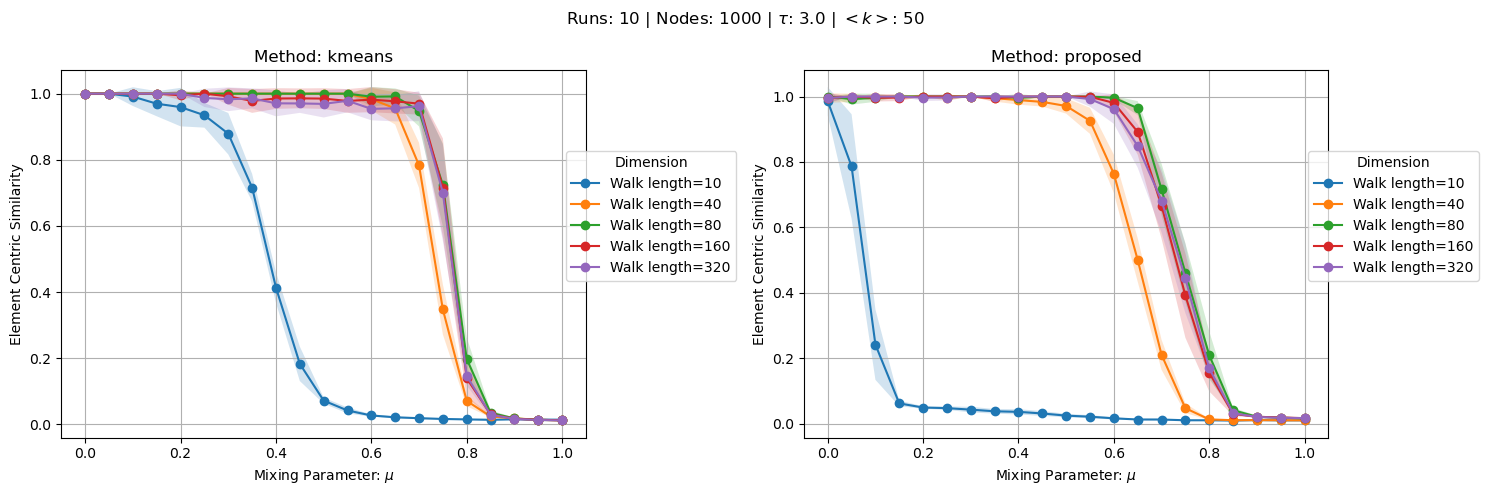